### **Compte Rendu TP1 Traitement d'Images**
**Réalisé par : BENSLIMANE Zahra - Apprentie ISI - Groupe 1**

In [98]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### **Note :** 
In this lab, I will be mostly working with images loaded with the open CV library, that means that the loaded images are coded BGR, whereas I will be plotting them with matplotlib's imshow() function who takes an RGB images as arguments.

Text(0.5, 1.0, 'Original Image')

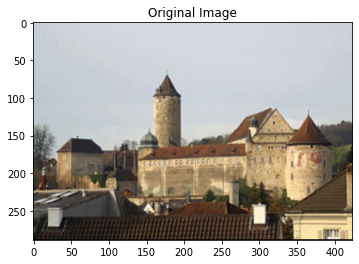

In [99]:
# open method used to open image file
I = cv2.imread("Images_TP/donjon.png",cv2.IMREAD_COLOR)
# Plot the colored image
plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

Implement a function able to extract the red component of an image.

### **Question 01 : Implement a function able to extract the red component of an image.**

Text(0.5, 1.0, 'Blue channel')

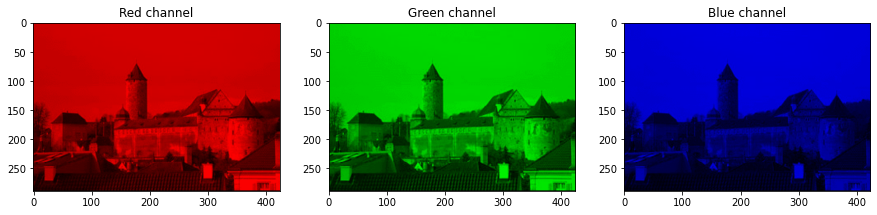

In [100]:
def extractChannel(Im,channel):
    ImageRes = Im.copy()
    # Force to zero the unwanted channels
    if channel == "red":
        ImageRes[:,:,0] = 0   
        ImageRes[:,:,1] = 0
    elif channel == "green":
        ImageRes[:,:,0] = 0
        ImageRes[:,:,2] = 0
    elif channel == "blue":
        ImageRes[:,:,1] = 0
        ImageRes[:,:,2] = 0
    return ImageRes

# Read the image with open CV --- PIL'Image does not accept assignment 
I = cv2.imread("Images_TP/donjon.png",cv2.IMREAD_COLOR)
red_img = extractChannel(I,"red") 
green_img = extractChannel(I,"green") 
blue_img = extractChannel(I,"blue") 
# Plot the image : 3 channels image with the green and blue to zero
figure = plt.figure(figsize=(15, 7))
plt.subplot(1,3,1); plt.imshow(cv2.cvtColor(red_img, cv2.COLOR_BGR2RGB)) ; plt.title("Red channel")
plt.subplot(1,3,2); plt.imshow(cv2.cvtColor(green_img, cv2.COLOR_BGR2RGB)) ; plt.title("Green channel")
plt.subplot(1,3,3); plt.imshow(cv2.cvtColor(blue_img, cv2.COLOR_BGR2RGB)) ; plt.title("Blue channel")


### **Question 02 : . Implémentez une fonction qui va créer le négatif d’une image**
from 255,
you will so need to substract the intensity’s component – RGB - of each pixel.
This will invert each color’s intensity of each pixel: the bright will become dark
and vice versa

Text(0.5, 1.0, 'Negative Image')

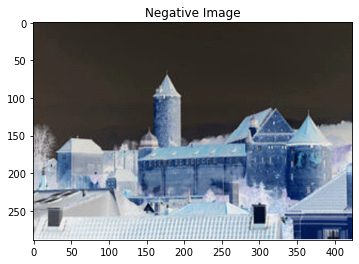

In [101]:
def ImageNegative(Im):
    return 255 - Im

negative = ImageNegative(I) 

plt.imshow(cv2.cvtColor(negative, cv2.COLOR_BGR2RGB))
plt.title("Negative Image")


### **Question 03 : Convertir une image couleur en noir et blanc (niveaux de gris).**

In such an image,
each pixel is black, white or has a gray level between 0 and 1. This means
that the components have the same value. The standard formula giving the
grey level function of the components is:
gray = 0.299 * red + 0.587 * green + 0.114 * blue


Output image shape : gray.shape =  (289, 424)


Text(0.5, 1.0, 'GrayScale Image')

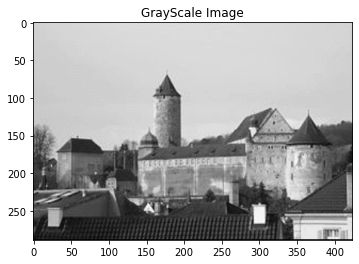

In [102]:
def color2gray(img):
    (blue, green, red) = img[:,:,0], img[:,:,1], img[:,:,2]  # Extract all components
    gray  = 0.299 * red + 0.587 * green + 0.114 * blue       # Add the weighted components 
    return gray

gray = color2gray(I)
print("Output image shape : gray.shape = ", gray.shape)  # check in it is a single matrix 
# Plot the output image
plt.imshow(gray, cmap = 'gray')
plt.title("GrayScale Image")

### **Question 04 : Convert a color image to sepia tones. In photography, sepia is a print quality**
that looks like black and white, but with variations of brown, not gray. In the
transformation of a color image into an image in sepia tones, we consider
the next transformations:

outputRed = (inputRed * .393) + (inputGreen *.769) + (inputBlue * .189)

outputGreen = (inputRed * .349) + (inputGreen *.686) + (inputBlue * .168)

outputBlue = (inputRed * .272) + (inputGreen *.534) + (inputBlue * .131)

NB: in case of saturation (resulting intensity>255), set the value to 255.

Text(0.5, 1.0, 'Sepia Image')

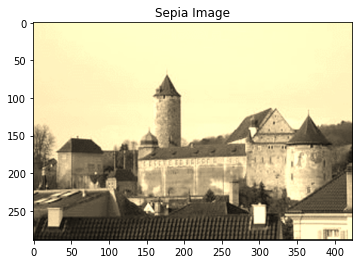

In [103]:
def sepia(img):
    width, height = img.shape[0],img.shape[1]   # shape of the original image
    imgRes = img.copy()
    
    # Loop through each pixel
    for py in range(height):
        for px in range(width):
            # Extract the intensity of each componenet of a pixel
            inputBlue, inputGreen, inputRed = img[px, py]  
            # Compute the new pixel values
            outputRed = (inputRed * .393)   + (inputGreen *.769) + (inputBlue * .189)
            outputGreen = (inputRed * .349) + (inputGreen *.686) + (inputBlue * .168)
            outputBlue = (inputRed * .272)  + (inputGreen *.534) + (inputBlue * .131)
            
            # Make sure we don't exceed the maximum intensity value
            if outputRed > 255  :  outputRed   = 255
            if outputGreen > 255:  outputGreen = 255
            if outputBlue > 255 :  outputBlue  = 255
            # update the pixel values
            imgRes[px, py] = (outputBlue,outputGreen,outputRed) 
    return imgRes

outputSepia = sepia(I)
# Plot the output image
plt.imshow(cv2.cvtColor(outputSepia, cv2.COLOR_BGR2RGB))
plt.title("Sepia Image")


### **Question 05 : Contrast **
For each component of each pixel,
apply the following rules: a. If the value is less than
30, assign the value 0.
b. If the value is greater than 225, assign the value 255.
c. The c values between 30 and 225 will be recalculated with the formula:
(255.0 / 195.0) * (c - 30) + 0.5.

With a calculator, you will find that, for example: 30 becomes 0, 225
becomes 255, 45 becomes 20, 180 becomes 196, 120 becomes 118. The
values "deviate" from each other, which increases the contrast.

Text(0.5, 1.0, 'Contrast Enhancement')

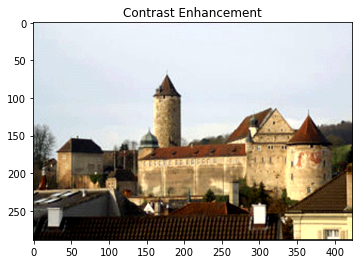

In [104]:
def enhanceContrast(img):
    width, height = img.shape[0],img.shape[1]  # shape of the original image
    imgRes = img.copy()
    
    # Loop through each pixel
    for py in range(height):
        for px in range(width):
            # Extract the intensity of each componenet of a pixel
            Blue, Green, Red = img[px, py]
            
            # Blue channel
            if Blue < 30    : outputBlue = 0
            elif Blue > 225 : outputBlue = 255
            else: outputBlue = (255.0 / 195.0) * (Blue - 30) + 0.5  
            
            # Green Channel
            if Green < 30    : outputGreen = 0
            elif Green > 225 : outputGreen = 255
            else: outputGreen = (255.0 / 195.0) * (Green - 30) + 0.5  
            
            # Red channel
            if Red < 30    : outputRed = 0
            elif Red > 225 : outputRed = 255
            else: outputRed = (255.0 / 195.0) * (Red - 30) + 0.5  
            
            imgRes[px, py] = (outputBlue,outputGreen,outputRed) # Update pixel values
    
    return imgRes
 
endancedImage = enhanceContrast(I)
plt.imshow(cv2.cvtColor(endancedImage, cv2.COLOR_BGR2RGB))
plt.title("Contrast Enhancement")

### **Question 06 : Thresholding.**
Image thresholding is the simplest method of image
segmentation. From a grayscale image, image thresholding can be used to
create an image with only two values, black or white (monochrome). The
pixels of an image are replaced one by one with respect to a fixed threshold
value (for example 123). Thus, if a pixel has a value greater than the threshold
(for example 150), it will take the value 255 (white), and if its value is lower
(for example 100), it will take the value 0 (black).

Text(0.5, 1.0, 'Binary Image')

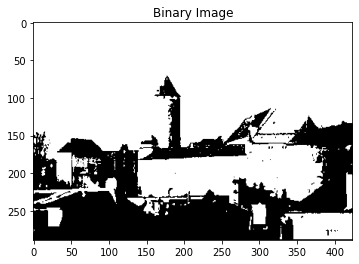

In [105]:
def BWThresholding(img, threshold):  
    minValue, maxValue = 0,255 # The binary values 
    width, height = img.shape[0],img.shape[1]  # shape of the original image
    imgRes = img.copy() #create a copy of the original image
    # Loop through each pixel
    for py in range(height):
        for px in range(width):
            niveauDeGris = img[px, py]  # get the intensity at that pixel
            niveauDeGris = minValue if niveauDeGris < threshold else maxValue  #binarizing
            imgRes[px, py] = niveauDeGris
    return imgRes
    
binary =   BWThresholding(gray,100)
plt.imshow(binary , cmap = 'gray')
plt.title("Binary Image")

With a color image, we will do the same with the three components red,
green and blue. There will thus be eight possible colors for each pixel: white,
black, red, green, blue, magenta, yellow and cyan.

Text(0.5, 1.0, 'Thresholding Color Image')

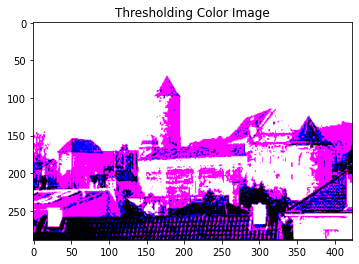

In [106]:
def colorThresholding(img, blue_threshold, green_threshold, red_threshold):
    minValue, maxValue = 0,255 # The binary values 
    width, height = img.shape[0],img.shape[1] # shape of the original image
    imgRes = img.copy() #create a copy of the original image
    
    for py in range(height):
        for px in range(width):
    
            Blue, Green, Red = img[px, py]  # get the intensity at that pixel
            # Compute / threshold 
            outputBlue = minValue if Blue < blue_threshold else maxValue
            outputGreen = minValue if Blue < green_threshold else maxValue
            outputRed = minValue if Blue < red_threshold else maxValue
            
            imgRes[px, py] = (outputBlue,outputGreen,outputRed)
    
    return imgRes
    
thresholded =   colorThresholding(I,40,100,50)
plt.imshow(cv2.cvtColor(thresholded, cv2.COLOR_BGR2RGB))
plt.title("Thresholding Color Image")


### **Question 07 : Flip :  Horizontal Flip**

Text(0.5, 1.0, 'Fliped  Image')

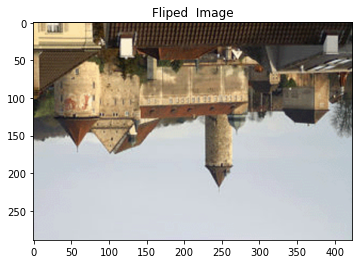

In [107]:
def flip(img):
    width, height = img.shape[0],img.shape[1]
    imgRes = img.copy()  #Copy the original image or create an ampty image 
    
    for py in range(height):
        for px in range(width):
            Blue, Green, Red = img[px, py]                
            imgRes[width -1 - px, height- 1 - py] = (Blue,Green,Red)  # Work backwards
    
    return imgRes

FlipedImage =   flip(I)
# Plot the output image
plt.imshow(cv2.cvtColor(FlipedImage, cv2.COLOR_BGR2RGB))
plt.title("Fliped  Image")

### **Question 08 : Border :** create a border of some width and color

idea : create background (same size as original image or bigger ) then place the image (complete or croped) into this backgroud

Text(0.5, 1.0, 'Image with same size as original : size =  (289, 424, 3)')

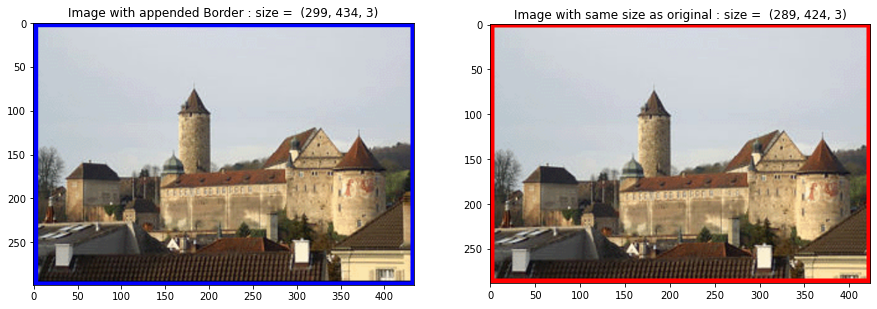

In [108]:
def border(img, borderWidth, borderColor, mode):
    
    width, height = img.shape[0],img.shape[1]  
    
    if mode == "addBorder":
        # create background with bigger size then the original image
        blank_image = np.zeros((width + 2*borderWidth,height + 2*borderWidth,3), np.uint8)
        # Color the backgroud with the choosed color
        if borderColor =="blue" : blank_image[:]=(255,0,0)  
        if borderColor =="green" : blank_image[:]=(0,255,0)
        if borderColor =="red" : blank_image[:]=(0,0,255)
        # Glue the image into the background    
        for py in range(height):
            for px in range(width):
                blank_image[px+borderWidth +1 , py+borderWidth +1] = img[px, py]
        return blank_image
    
    elif mode == "sameSize":
        # create background   with the same size as original image
        blank_image = np.zeros((width,height,3), np.uint8)
        # Color the backgroud with the choosed color
        if borderColor =="blue" : blank_image[:]=(255,0,0)
        if borderColor =="green" : blank_image[:]=(0,255,0)
        if borderColor =="red" : blank_image[:]=(0,0,255)
        # Copy the original image  and crop it : crop the orders       
        imgCopy = img.copy()
        imgCopy = imgCopy[borderWidth:width-borderWidth, borderWidth:height-borderWidth, : ]
        # Glue the croped image into the background    
        for py in range(borderWidth, height-borderWidth):
            for px in range(borderWidth, width - borderWidth):
                blank_image[px, py] = img[px - borderWidth , py - borderWidth ]
        return blank_image
     
    else:
        print("Please enter a correct mode.")
        
borderImage1 =   border(I,5,"blue","addBorder")
borderImage2 =   border(I,5,"red","sameSize")

figure = plt.figure(figsize=(15, 7))
plt.subplot(1,2,1); plt.imshow(cv2.cvtColor(borderImage1, cv2.COLOR_BGR2RGB)) ; plt.title("Image with appended Border : size =  {}".format(borderImage1.shape) )
plt.subplot(1,2,2); plt.imshow(cv2.cvtColor(borderImage2, cv2.COLOR_BGR2RGB)) ; plt.title("Image with same size as original : size =  {}".format(borderImage2.shape))



### **Question 09 : Create an edge that will give an impression of relief**
It will consist of 4
polygonal regions with a width of 10 pixels. The pixels of the top region will
be lightened by 65, those of the bottom region darkened by 65. On the right
and left, they will be darkened by 40. The difficulty of the exercise lies in
managing the corners ...

Text(0.5, 1.0, 'Relief  Image')

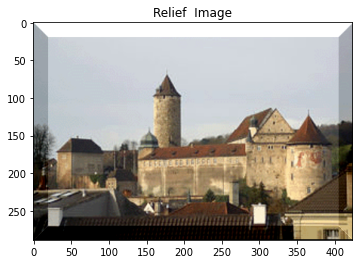

In [109]:
def relief(img,reliefSize):
    
    width, height = img.shape[0],img.shape[1]
    imgRes = img.copy()
    
    for py in range(height):
        for px in range(width):

            Blue, Green, Red = img[px, py]
            outputBlue,outputGreen,outputRed =  Blue, Green, Red 
            
            # TOP
            if px < reliefSize and  py > px and py < height - px : 
                outputBlue,outputGreen,outputRed = Blue+65, Green+65, Red+65
                if outputBlue > 255:  outputBlue = 255
                if outputGreen > 255:  outputGreen = 255
                if outputRed > 255:  outputRed = 255
                
            # LEFT  or Right
            if (py < reliefSize and px > py and px < width - py) or  (py > height - reliefSize  and px > height - py  and py > height - (width - px) ): 
                outputBlue,outputGreen,outputRed = Blue-40, Green-40, Red-40
                if outputBlue < 0:  outputBlue = 0
                if outputGreen < 0:  outputGreen = 0
                if outputRed < 0:  outputRed = 0
                
            # BOTTOM 
            if px > width - reliefSize and  px > width - py and py < height - (width - px) :  
                outputBlue,outputGreen,outputRed = Blue-65, Green-65, Red-65
                if outputBlue < 0:  outputBlue = 0
                if outputGreen < 0:  outputGreen = 0
                if outputRed < 0:  outputRed = 0         


            imgRes[px, py] = (outputBlue,outputGreen,outputRed)
            
    return imgRes
    
reliefImage =   relief(I,20)

plt.imshow(cv2.cvtColor(reliefImage, cv2.COLOR_BGR2RGB))
plt.title("Relief  Image")

### **Question 10 : "Pixelize" (ordinal = 10).**
The idea is to divide the image into squares of 10 by
10 pixels (in the edges, they will be rectangles). In a "square", each
component of each pixel will be the average value of the square.

In [110]:
# Read the Lena image
Lena = cv2.imread("Images_TP/Lena.jpg",cv2.IMREAD_COLOR)

Text(0.5, 1.0, 'Pixelized  Image')

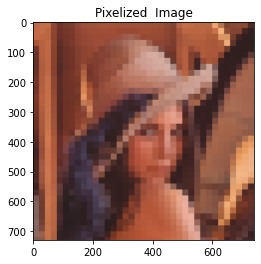

In [111]:

def pixelize(img,ordinal):
    width, height = img.shape[0],img.shape[1]
    imgRes = img.copy()
    # Loop through the image with some Amount of pixels at a time
    for py in range(0,height,ordinal):
        for px in range(0,width,ordinal):
            box = imgRes[px:px+ordinal , py:py+ordinal, :]   
            imgRes[px:px+ordinal , py:py+ordinal, 0] = np.mean(box[:,:,0])
            imgRes[px:px+ordinal , py:py+ordinal, 1] = np.mean(box[:,:,1])
            imgRes[px:px+ordinal , py:py+ordinal, 2] = np.mean(box[:,:,2])   
    return imgRes

pixelizedImage =  pixelize(Lena, 20)

plt.imshow(cv2.cvtColor(pixelizedImage, cv2.COLOR_BGR2RGB))  
plt.title("Pixelized  Image")
